In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format) # Переводим экспоненциальную запись числа в обычную

## Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы
### 1.1. Скачать данные

In [2]:
houses = pd.read_csv('kc-house-data.csv')
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.2 Изучите стоимости недвижимости

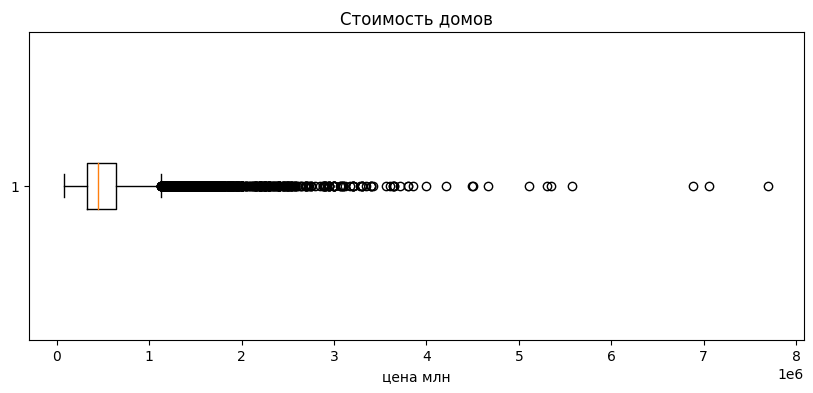

In [4]:
plt.figure(figsize=(10, 4))
plt.boxplot(houses['price'], vert=False);
plt.title('Стоимость домов')
plt.xlabel('цена млн')
plt.ylabel('');

Видно, что большая часть цен, в данной выборке, сосредоточена до, примерно, 1.1 млн с медианой в области 0.5 млн.
Имеется большое кол-во выбросов в сторону увеличения стоимости.

### 1.3 Изучите распределение квадратуры жилой

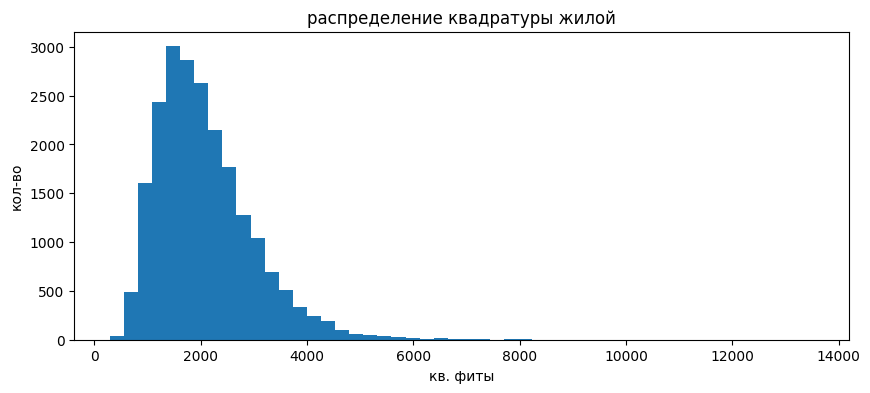

In [5]:
plt.figure(figsize=(10, 4))
plt.hist(houses['sqft_living'], bins=50);
plt.title('распределение квадратуры жилой')
plt.xlabel('кв. фиты')
plt.ylabel('кол-во');

Жилая площадь, в основном, сосредоточена около 1800 квадратных футов.

### 1.4 Изучите распределение года постройки

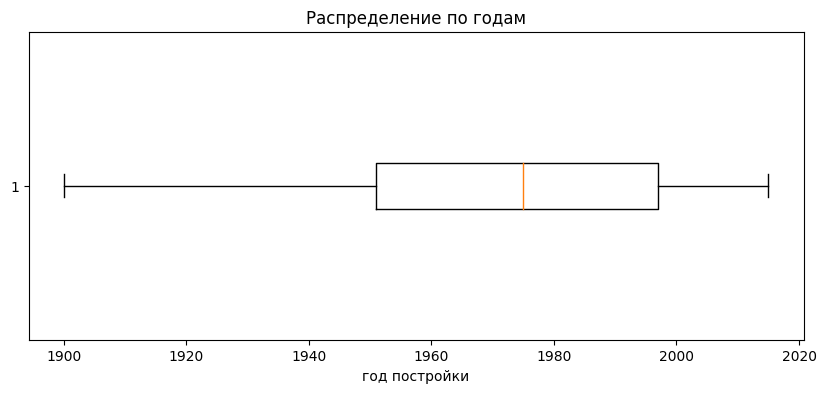

In [6]:
plt.figure(figsize=(10, 4))
plt.boxplot(houses['yr_built'], vert=False);
plt.title('Распределение по годам')
plt.xlabel('год постройки')
plt.ylabel('');

Мепдианное значение годов постройки около 1975.

Довольно широкий разброс, выбросов не наблюдается.

Половина домов построена от 1950 до 1997 примерно.

## Задача 2

- Постройте график
- Сделайте выводы

### 2.1 Изучите распределение домов от наличия вида на набережную

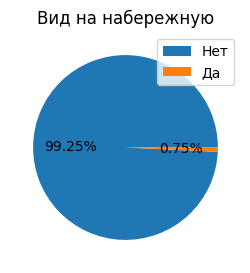

In [7]:
plt.figure(figsize=(3, 3))

plt.pie(houses['waterfront'].value_counts(), autopct='%.2f%%')

plt.title('Вид на набережную')
plt.legend(['Нет','Да']);

Вид на набережную встречается только в 0.75% домов выборки. Крайне редкое явление.

### 2.2 Изучите распределение этажей домов

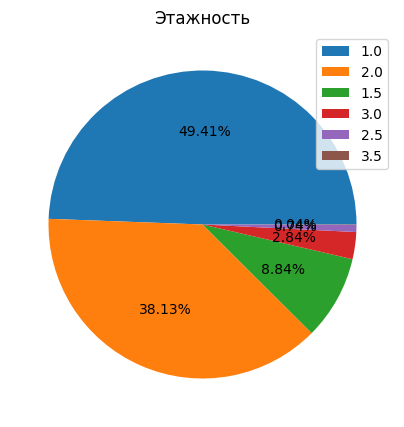

In [8]:
plt.figure(figsize=(5, 5))

plt.pie(houses['floors'].value_counts(), autopct='%.2f%%')

plt.title('Этажность')
plt.legend(houses['floors'].value_counts().index);

В таблице встречаются дома с половинным этажем, может мансарда, незнаю.

Почти половина домов имеет 1 этаж, 38% 2 этажа, остальных значительно меньше.

### 2.3 Изучите распределение состояния домов

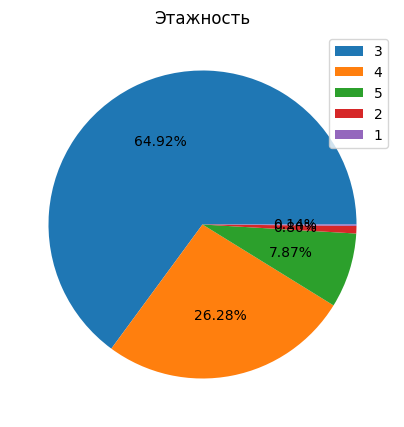

In [9]:
plt.figure(figsize=(5, 5))

plt.pie(houses['condition'].value_counts(), autopct='%.2f%%')

plt.title('Этажность')
plt.legend(houses['condition'].value_counts().index);

Около 65% имеют состояние 3 из 5. 26% состояние оценивается на 4 и только около 8 процентов на 5, что в суммме порядка 99% состояние от удовлетворительного до отличного.


## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости,
с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [10]:
corr_matrix = houses.corr(numeric_only = True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
price,0.00,1.00,0.30,0.50,0.70,0.00,0.30,0.30,0.40,0.00,0.70,0.60,0.30,0.00,0.00,0.00,0.30,0.00,0.60,0.00
bedrooms,0.00,0.30,1.00,0.50,0.60,0.00,0.00,0.00,0.00,0.00,0.40,0.50,0.30,0.00,0.00,0.00,0.00,0.00,0.40,0.00
bathrooms,0.00,0.50,0.50,1.00,0.80,0.00,0.50,0.00,0.00,0.00,0.70,0.70,0.30,0.50,0.00,0.00,0.00,0.00,0.60,0.00
sqft_living,0.00,0.70,0.60,0.80,1.00,0.00,0.40,0.00,0.30,0.00,0.80,0.90,0.40,0.30,0.00,0.00,0.00,0.00,0.80,0.00
sqft_lot,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70
floors,0.00,0.30,0.00,0.50,0.40,0.00,1.00,0.00,0.00,-0.30,0.50,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.30,0.00
waterfront,0.00,0.30,0.00,0.00,0.00,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.00,0.40,0.00,0.00,0.30,0.00,0.00,0.40,1.00,0.00,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.30,0.00
condition,0.00,0.00,0.00,0.00,0.00,0.00,-0.30,0.00,0.00,1.00,0.00,0.00,0.00,-0.40,0.00,0.00,0.00,0.00,0.00,0.00


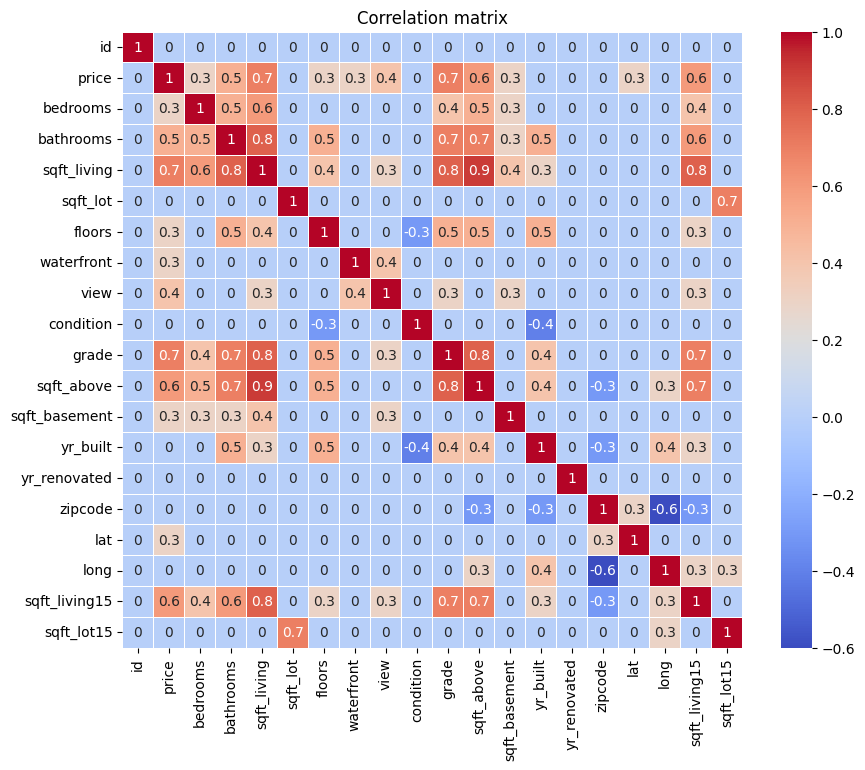

In [11]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

По тепловой карте можно быстро выделить высокие значения корреляции цены домов к след. признакам:

- bedrooms
- bathrooms
- sqft_living
- floors
- waterfront
- view
- grade
- sqrt_above (имеет высокую кореляцию с ранее указанным sqft_living, полагаю стоит рассматривать как один общий признак)
- sqft_basement

В целом практически все признаки числовые. Рассмотрим некоторые из них отдельно

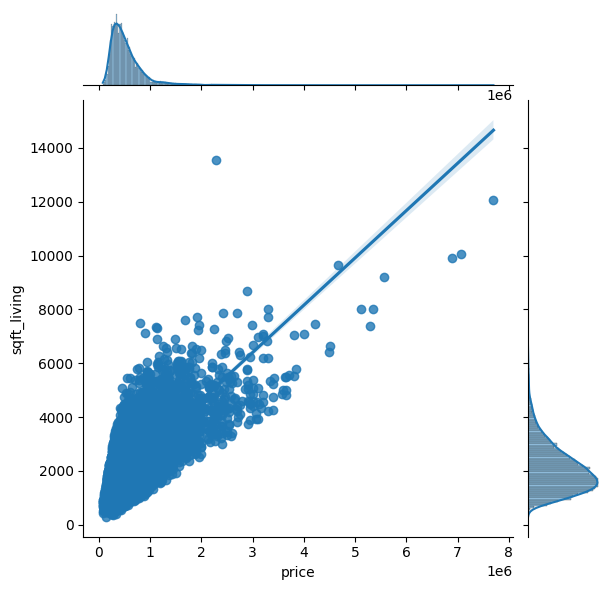

In [12]:
sns.jointplot(x=houses['price'], y=houses['sqft_living'], kind='reg');

По графику видна линейная корреляция. Есть буквально единичный выброс. При высоких значениях жилой площади связь признаков ослабевает.

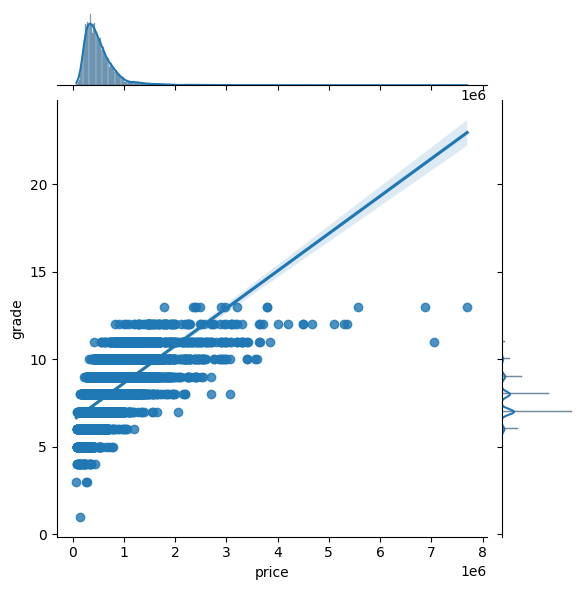

In [13]:
sns.jointplot(x=houses['price'], y=houses['grade'], kind='reg');

По графику видна линейная корреляция.
Есть выбросы в сторону увеличения цены, видимо влиянеие других признаков


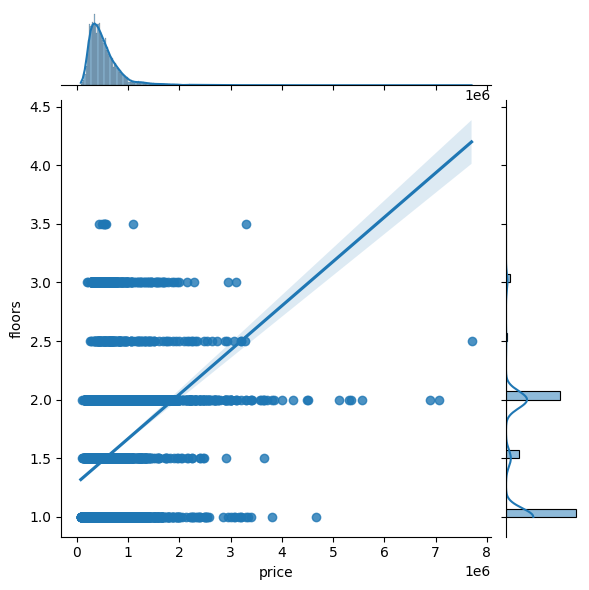

In [14]:
sns.jointplot(x=houses['price'], y=houses['floors'], kind='reg');